# Capstone Project - Car Accident Severity Prediction

## Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

The object of this project is predicting the severity of an accident by time, driving condition and location. The target of this project is car drivers, the project will inform them about under which conditions they need to be more caution. If the drivers are more caution under dangerous conditions, there will be less accidents occur.

In addition, this project can also help Seattle Department of Transportation providing signs at locations where accidents occur frequently. 


## Data <a name="data"></a>

Based on definition of our problem, the factors that will influence our analysis are:

* **Type of location of the accident**: Represented by **ADDRTYPE**, *e.g. block, intersection*. 
* **Severity**: **The target of this project**, represented by **SEVERITYCODE**, *1 means property damage only, 2 means injury collision, 2b means serious injury, and 3 means fatality*
* **Date**: The date and time of the accident, represented by **INCDTTM**
* **Condition**: The weather condition **WEATHER**, *e.g. clear, raining*, the road condition **ROADCOND**, *e.g. wet, dry* and the light condition **LIGHTCOND** during the collision *e.g. daylight, dark*.

**The dataset used in this project is provied by Seattle Department of Transportation, which can be found** [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv)

Firstly, we import the libraries we need for this project: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Then, read the dataset and name it as collisions using pd.read_csv():

In [3]:
collisions = pd.read_csv('Data-Collisions.csv')
collisions.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Check the informations of our dataset using .info():

In [4]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

# Methodology

## Data Cleaning

Not all the factors are used for the analysis, we only keep the factors mentioned in **Data** section

In [5]:
collisions = collisions.reset_index()[['SEVERITYCODE', 'ADDRTYPE', 'INCDTTM', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]
collisions.head()

,SEVERITYCODE,ADDRTYPE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight
1,1,Block,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On
2,1,Block,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight
3,1,Block,3/29/2013 9:26:00 AM,Clear,Dry,Daylight
4,2,Intersection,1/28/2004 8:04:00 AM,Raining,Wet,Daylight


### Missing Values
Count the number of missing values in the factors we are interested in

In [6]:
collisions.isnull().sum()

SEVERITYCODE       0
ADDRTYPE        1926
INCDTTM            0
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

We can find that there are only few missing values (less than 5%) in each factor, therefore we can drop the missing values in all features. 

In [7]:
collisions = collisions.dropna()

In [8]:
collisions.isnull().sum()

SEVERITYCODE    0
ADDRTYPE        0
INCDTTM         0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
dtype: int64

There are values such as 'unknown' and 'other' under **WEATHER**, **LIGHTCOND** and **ROADCOND** which also need to be removed: 

In [9]:
collisions['WEATHER'] = collisions['WEATHER'].replace(to_replace=['Unknown', 'Other'], value=np.nan)
collisions['ROADCOND'] = collisions['ROADCOND'].replace(to_replace=['Unknown', 'Other'], value=np.nan)
collisions['LIGHTCOND'] = collisions['LIGHTCOND'].replace(to_replace=['Unknown', 'Other', 'Dark - Unknown Lighting'], value=np.nan)
collisions = collisions.dropna()

### Convert Data

Check the types of the data in interested features: 

In [10]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169239 entries, 0 to 194672
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  169239 non-null  int64 
 1   ADDRTYPE      169239 non-null  object
 2   INCDTTM       169239 non-null  object
 3   WEATHER       169239 non-null  object
 4   ROADCOND      169239 non-null  object
 5   LIGHTCOND     169239 non-null  object
dtypes: int64(1), object(5)
memory usage: 9.0+ MB


We can find that the data type of **INCDTTM** is **object**, we need to change it to **datetime64**. 

In [11]:
collisions['INCDTTM'] = pd.to_datetime(collisions['INCDTTM'])
collisions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169239 entries, 0 to 194672
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   SEVERITYCODE  169239 non-null  int64         
 1   ADDRTYPE      169239 non-null  object        
 2   INCDTTM       169239 non-null  datetime64[ns]
 3   WEATHER       169239 non-null  object        
 4   ROADCOND      169239 non-null  object        
 5   LIGHTCOND     169239 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 9.0+ MB


Then, we extract new factors **hour**, **day** and **month** from **INCDTTM** and drop the original **INCDTTM** column

In [12]:
collisions['HOUR'] = collisions["INCDTTM"].dt.hour
collisions['DAY'] = collisions["INCDTTM"].dt.day_name()
collisions['MONTH'] = collisions["INCDTTM"].dt.month

month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
collisions['MONTH'] = collisions['MONTH'].apply(lambda x: month[x])

collisions.drop(columns = ['INCDTTM'], inplace = True)

collisions.head()

,SEVERITYCODE,ADDRTYPE,WEATHER,ROADCOND,LIGHTCOND,HOUR,DAY,MONTH
0,2,Intersection,Overcast,Wet,Daylight,14,Wednesday,March
1,1,Block,Raining,Wet,Dark - Street Lights On,18,Wednesday,December
2,1,Block,Overcast,Dry,Daylight,10,Thursday,November
3,1,Block,Clear,Dry,Daylight,9,Friday,March
4,2,Intersection,Raining,Wet,Daylight,8,Wednesday,January


### Balancing the Dataset

Firstly, check the number of data under each category of each factor

In [13]:
collisions['ADDRTYPE'].value_counts()

Block           107379
Intersection     61267
Alley              593
Name: ADDRTYPE, dtype: int64

In [14]:
collisions['WEATHER'].value_counts()

Clear                       108374
Raining                      32510
Overcast                     26809
Snowing                        821
Fog/Smog/Smoke                 547
Sleet/Hail/Freezing Rain       106
Blowing Sand/Dirt               42
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

Here, we can see that the categories 'Blowing Sand/Dirt', 'Severe Crosswind' and 'Partly Cloudy' have only a few data, so we also need to remove them

In [15]:
collisions['WEATHER'] = collisions['WEATHER'].replace(to_replace= ['Partly Cloudy', 'Severe Crosswind', 'Blowing Sand/Dirt'], value=np.nan)

In [16]:
collisions['ROADCOND'].value_counts()

Dry               120978
Wet                46135
Ice                 1072
Snow/Slush           829
Standing Water       101
Sand/Mud/Dirt         64
Oil                   60
Name: ROADCOND, dtype: int64

The categories 'Sand/Mud/Dirt' and 'Oil' have only a few data, they need to be removed

In [17]:
collisions['ROADCOND'] = collisions['ROADCOND'].replace(to_replace= ['Oil', 'Sand/Mud/Dirt'], value=np.nan)

In [18]:
collisions['LIGHTCOND'].value_counts()

Daylight                    112126
Dark - Street Lights On      46589
Dusk                          5610
Dawn                          2404
Dark - No Street Lights       1402
Dark - Street Lights Off      1108
Name: LIGHTCOND, dtype: int64

In [19]:
collisions['HOUR'].value_counts()

0     25843
17    11706
16    11093
15    10493
14     9776
13     9278
12     9152
18     8601
8      7587
11     7416
9      7161
10     6537
19     6428
7      5882
20     5433
21     4937
22     4819
23     3948
2      3212
1      3065
6      2835
5      1512
3      1444
4      1081
Name: HOUR, dtype: int64

In [20]:
collisions['DAY'].value_counts()

Friday       28159
Thursday     25579
Wednesday    25057
Tuesday      24827
Saturday     23920
Monday       22727
Sunday       18970
Name: DAY, dtype: int64

In [21]:
collisions['MONTH'].value_counts()

October      15437
June         14689
May          14600
July         14497
August       14375
November     14270
March        14113
January      14091
September    14014
April        13982
December     13132
February     12039
Name: MONTH, dtype: int64

No category need to be removed from **LIGHTCOND**, **HOUR**, **DAY** and **MONTH**

In [22]:
collisions = collisions.dropna()

Then, we need to check whether our data set is balanced by checking the number of data under each category of target **SEVERITYCODE**:

In [23]:
collisions["SEVERITYCODE"].value_counts()

1    113571
2     55472
Name: SEVERITYCODE, dtype: int64

We can see that our target **SEVERITYCODE** is not balanced, the data under class 1 is two times the size of class 2. We need to balance the data by downsampling class 1. 

In [24]:
from sklearn.utils import resample

In [25]:
collisions_SC1 = collisions[collisions['SEVERITYCODE'] == 1]
collisions_SC2 = collisions[collisions['SEVERITYCODE'] == 2]

collisions_SC1 = resample(collisions_SC1, n_samples = 55472)
collisions = pd.concat([collisions_SC1, collisions_SC2])

collisions["SEVERITYCODE"].value_counts()

2    55472
1    55472
Name: SEVERITYCODE, dtype: int64

## Explanatory Data Analysis

In this section, we are analyzing under which condition the accidents are more severe by comparing the percentage of accident with **SEVERITYCODE** 2 among all accidents under each condition. Firstly, we compare different address types: 

In [26]:
grpd_add = collisions.groupby(['SEVERITYCODE','ADDRTYPE']).size().unstack(fill_value=0).stack().reset_index(name='COUNTS')
grpd_add_SC1 = grpd_add[grpd_add['SEVERITYCODE'] == 1].reset_index()
grpd_add_SC2 = grpd_add[grpd_add['SEVERITYCODE'] == 2].reset_index()
grpd_add_SC_perc = ((grpd_add_SC2[['COUNTS']] / (grpd_add_SC1[['COUNTS']] + grpd_add_SC2[['COUNTS']])) * 100).round(2)
grpd_add_SC_perc = pd.concat([grpd_add_SC1['ADDRTYPE'], grpd_add_SC_perc['COUNTS']], axis = 1)
grpd_add_SC_perc.set_index('ADDRTYPE', inplace = True)
grpd_add_SC_perc.rename(columns = {'COUNTS':'PERCENTAGES'}, inplace = True)
grpd_add_SC_perc

,PERCENTAGES
ADDRTYPE,
Alley,23.69
Block,42.64
Intersection,61.55


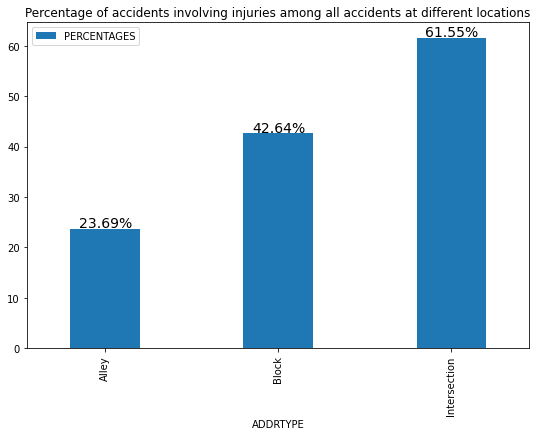

In [27]:
ax_add = grpd_add_SC_perc.plot(kind = 'bar', width = 0.4, figsize = (9,6))
ax_add.set_title("Percentage of accidents involving injuries among all accidents at different locations")
legend = ax_add.legend()
for percentage in ax_add.patches:
    ax_add.annotate(str(percentage.get_height()) + '%', xy = (percentage.get_x() + 0.05, percentage.get_height() + 0.3), fontsize = 14)


We can see that type of an address is correlated to the severity of an accident. At intersections, the accidents are tend to be most severe while at alleys, the accidents are tend to be less severe. 

Then, we compare different kinds of weather: 

In [28]:
grpd_weat = collisions.groupby(['SEVERITYCODE','WEATHER']).size().unstack(fill_value=0).stack().reset_index(name='COUNTS')
grpd_weat_SC1 = grpd_weat[grpd_weat['SEVERITYCODE'] == 1].reset_index()
grpd_weat_SC2 = grpd_weat[grpd_weat['SEVERITYCODE'] == 2].reset_index()
grpd_weat_SC_perc = (grpd_weat_SC2[['COUNTS']] / (grpd_weat_SC1[['COUNTS']] + grpd_weat_SC2[['COUNTS']]) * 100).round(2)
grpd_weat_SC_perc = pd.concat([grpd_weat_SC1['WEATHER'], grpd_weat_SC_perc['COUNTS']], axis = 1)
grpd_weat_SC_perc.rename(columns = {'COUNTS':'PERCENTAGES'}, inplace = True)
grpd_weat_SC_perc.set_index('WEATHER', inplace = True)
grpd_weat_SC_perc

,PERCENTAGES
WEATHER,
Clear,49.89
Fog/Smog/Smoke,49.32
Overcast,49.16
Raining,51.49
Sleet/Hail/Freezing Rain,45.76
Snowing,32.27


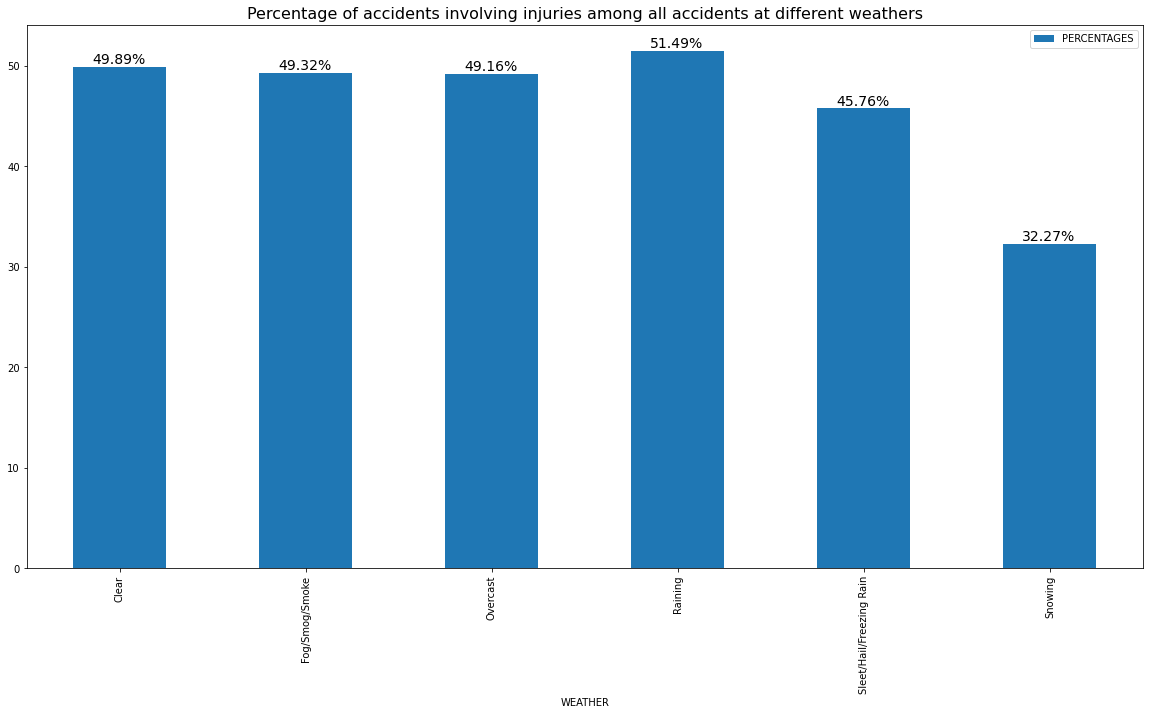

In [29]:
ax_weat = grpd_weat_SC_perc.plot(kind = 'bar', figsize = (20, 10))
ax_weat.set_title("Percentage of accidents involving injuries among all accidents at different weathers", fontsize = 16)
legend = ax_weat.legend()
for percentage in ax_weat.patches:
    ax_weat.annotate(str(percentage.get_height()) + '%', xy = (percentage.get_x() + 0.1, percentage.get_height() + 0.3), fontsize = 14)


From the data above, we can infer that the weather condition is also correlated to severity of the accident, the accidents tend to be less severe when there is freezing rain or snowing. A possible reason is that people tend to drive slower under these weather conditions. 

Then, we compare different kinds of road conditions: 

In [30]:
grpd_rd = collisions.groupby(['SEVERITYCODE','ROADCOND']).size().unstack(fill_value=0).stack().reset_index(name='COUNTS')
grpd_rd_SC1 = grpd_rd[grpd_rd['SEVERITYCODE'] == 1].reset_index()
grpd_rd_SC2 = grpd_rd[grpd_rd['SEVERITYCODE'] == 2].reset_index()
grpd_rd_SC_perc = (grpd_rd_SC2[['COUNTS']] / (grpd_rd_SC1[['COUNTS']] + grpd_rd_SC2[['COUNTS']]) * 100).round(2)
grpd_rd_SC_perc = pd.concat([grpd_rd_SC1['ROADCOND'], grpd_rd_SC_perc['COUNTS']], axis = 1)
grpd_rd_SC_perc.rename(columns = {'COUNTS':'PERCENTAGES'}, inplace = True)
grpd_rd_SC_perc.set_index('ROADCOND', inplace = True)
grpd_rd_SC_perc

,PERCENTAGES
ROADCOND,
Dry,49.76
Ice,40.41
Snow/Slush,30.85
Standing Water,45.00
Wet,51.17


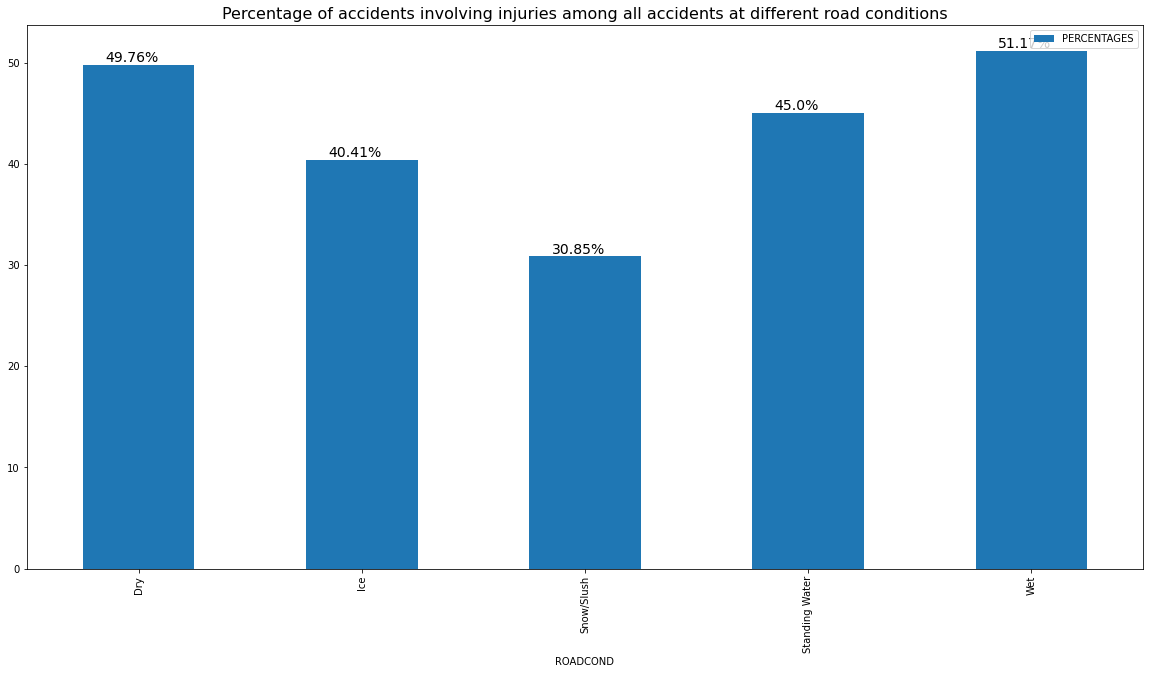

In [31]:
ax_rd = grpd_rd_SC_perc.plot(kind = 'bar', figsize = (20, 10))
ax_rd.set_title("Percentage of accidents involving injuries among all accidents at different road conditions", fontsize = 16)
legend = ax_rd.legend()
for percentage in ax_rd.patches:
    ax_rd.annotate(str(percentage.get_height()) + '%', xy = (percentage.get_x() + 0.1, percentage.get_height() + 0.3), fontsize = 14)

We can infer that the accidents are less severe when there is snow or ice on the road. 

In [32]:
grpd_lt = collisions.groupby(['SEVERITYCODE','LIGHTCOND']).size().unstack(fill_value=0).stack().reset_index(name='COUNTS')
grpd_lt_SC1 = grpd_lt[grpd_lt['SEVERITYCODE'] == 1].reset_index()
grpd_lt_SC2 = grpd_lt[grpd_lt['SEVERITYCODE'] == 2].reset_index()
grpd_lt_SC_perc = (grpd_lt_SC2[['COUNTS']] / (grpd_lt_SC1[['COUNTS']] + grpd_lt_SC2[['COUNTS']]) * 100).round(2)
grpd_lt_SC_perc = pd.concat([grpd_lt_SC1['LIGHTCOND'], grpd_lt_SC_perc['COUNTS']], axis = 1)
grpd_lt_SC_perc.rename(columns = {'COUNTS':'PERCENTAGES'}, inplace = True)
grpd_lt_SC_perc.set_index('LIGHTCOND', inplace = True)
grpd_lt_SC_perc

,PERCENTAGES
LIGHTCOND,
Dark - No Street Lights,36.82
Dark - Street Lights Off,43.44
Dark - Street Lights On,47.55
Dawn,52.04
Daylight,51.05
Dusk,52.33


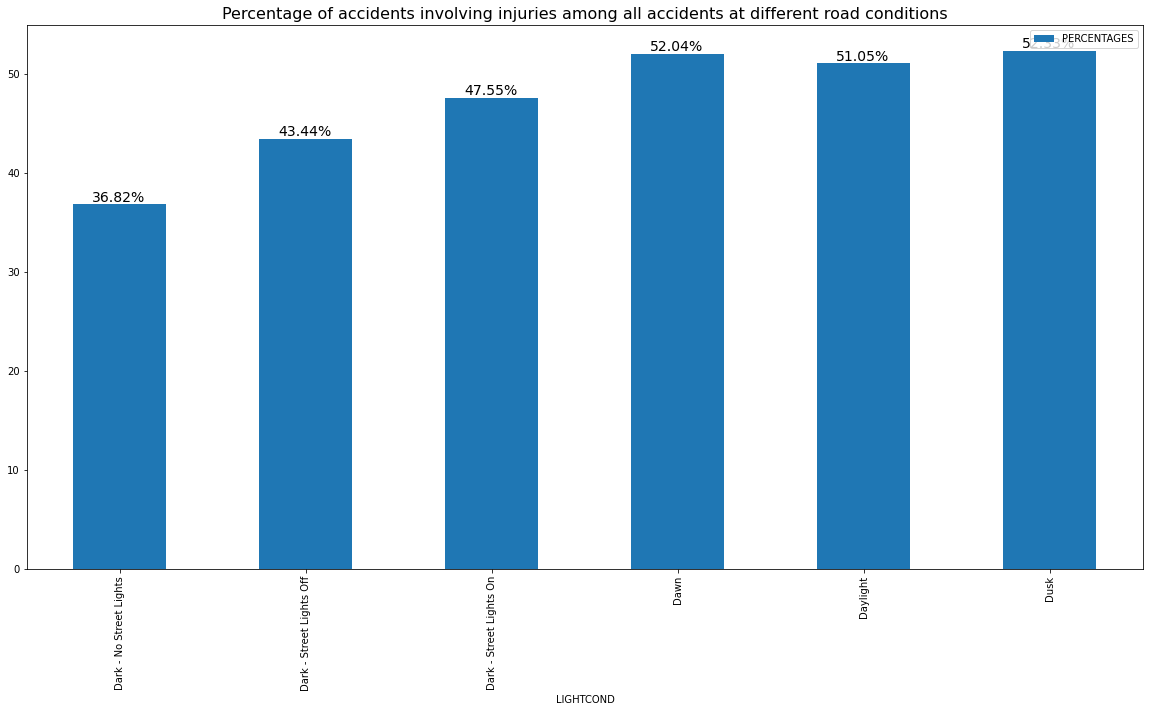

In [33]:
ax_lt = grpd_lt_SC_perc.plot(kind = 'bar', figsize = (20, 10))
ax_lt.set_title("Percentage of accidents involving injuries among all accidents at different road conditions", fontsize = 16)
legend = ax_lt.legend()
for percentage in ax_lt.patches:
    ax_lt.annotate(str(percentage.get_height()) + '%', xy = (percentage.get_x() + 0.1, percentage.get_height() + 0.3), fontsize = 14)

We can infer that the accidents tend to be less severe when the light is more insufficient. 

In [34]:
grpd_hr = collisions.groupby(['SEVERITYCODE','HOUR']).size().unstack(fill_value=0).stack().reset_index(name='COUNTS')
grpd_hr_SC1 = grpd_hr[grpd_hr['SEVERITYCODE'] == 1].reset_index()
grpd_hr_SC2 = grpd_hr[grpd_hr['SEVERITYCODE'] == 2].reset_index()
grpd_hr_SC_perc = (grpd_hr_SC2[['COUNTS']] / (grpd_hr_SC1[['COUNTS']] + grpd_hr_SC2[['COUNTS']]) * 100).round(2)
grpd_hr_SC_perc = pd.concat([grpd_hr_SC1['HOUR'], grpd_hr_SC_perc['COUNTS']], axis = 1)
grpd_hr_SC_perc.rename(columns = {'COUNTS':'PERCENTAGES'}, inplace = True)
grpd_hr_SC_perc.set_index('HOUR', inplace = True)
grpd_hr_SC_perc

,PERCENTAGES
HOUR,
0,47.41
1,42.52
2,42.87
3,38.50
4,39.32
5,48.52
6,52.48
7,52.43
8,52.15


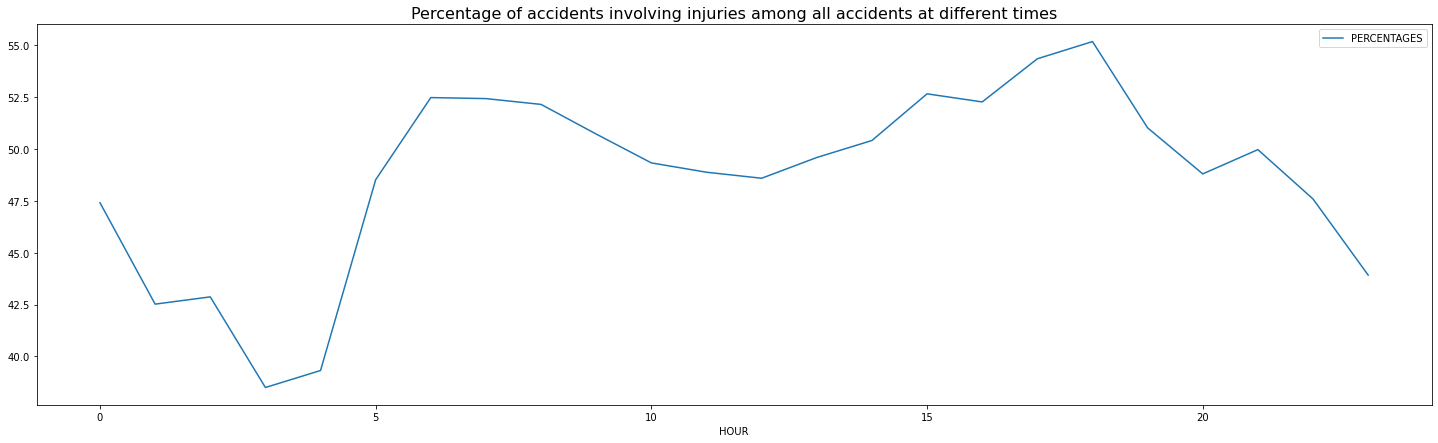

In [35]:
ax_hr = grpd_hr_SC_perc.plot(kind = 'line', figsize = (25, 7))
ax_hr.set_title("Percentage of accidents involving injuries among all accidents at different times", fontsize = 16)
legend = ax_hr.legend()
for percentage in ax_hr.patches:
    ax_hr.annotate(str(percentage.get_height()) + '%', xy = (percentage.get_x(), percentage.get_height() + 0.3), fontsize = 8)

We can infer that the accident tend to be more severe at rush hours, probably because there more cars on the road at rush hours. 

In [36]:
grpd_d = collisions.groupby(['SEVERITYCODE','DAY']).size().unstack(fill_value=0).stack().reset_index(name='COUNTS')
grpd_d_SC1 = grpd_d[grpd_d['SEVERITYCODE'] == 1].reset_index()
grpd_d_SC2 = grpd_d[grpd_d['SEVERITYCODE'] == 2].reset_index()
grpd_d_SC_perc = (grpd_d_SC2[['COUNTS']] / (grpd_d_SC1[['COUNTS']] + grpd_d_SC2[['COUNTS']]) * 100).round(2)
grpd_d_SC_perc = pd.concat([grpd_d_SC1['DAY'], grpd_d_SC_perc['COUNTS']], axis = 1)
grpd_d_SC_perc.rename(columns = {'COUNTS':'PERCENTAGES'}, inplace = True)

#Make the days in the right order
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
grpd_d_SC_perc['DAY_id'] = grpd_d_SC_perc['DAY'].map(sorterIndex)
grpd_d_SC_perc.set_index('DAY', inplace = True)
grpd_d_SC_perc.sort_values('DAY_id', inplace=True)
grpd_d_SC_perc.drop(['DAY_id'], axis = 1, inplace = True)
grpd_d_SC_perc

,PERCENTAGES
DAY,
Sunday,47.40
Monday,50.62
Tuesday,50.76
Wednesday,50.43
Thursday,51.24
Friday,49.50
Saturday,49.44


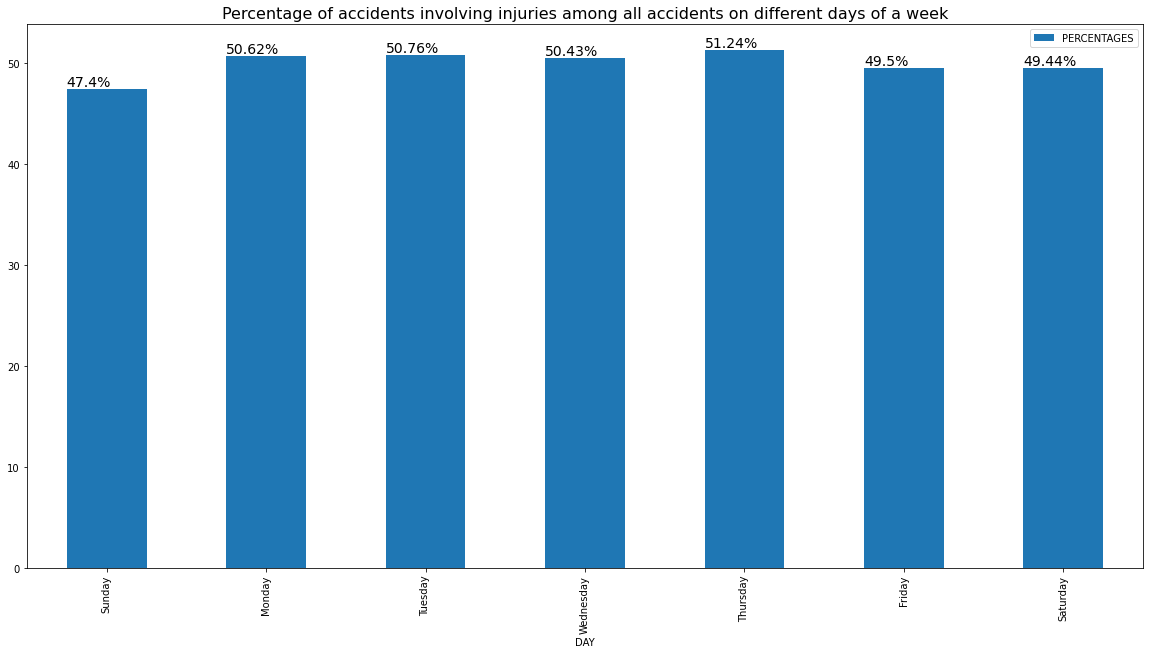

In [37]:
ax_d = grpd_d_SC_perc.plot(kind = 'bar', figsize = (20, 10))
ax_d.set_title("Percentage of accidents involving injuries among all accidents on different days of a week", fontsize = 16)
legend = ax_d.legend()
for percentage in ax_d.patches:
    ax_d.annotate(str(percentage.get_height()) + '%', xy = (percentage.get_x(), percentage.get_height() + 0.3), fontsize = 14)

We can infer that the accidents are slightly less severe on weekends. 

In [38]:
grpd_m = collisions.groupby(['SEVERITYCODE','MONTH']).size().unstack(fill_value=0).stack().reset_index(name='COUNTS')
grpd_m
grpd_m_SC1 = grpd_m[grpd_m['SEVERITYCODE'] == 1].reset_index()
grpd_m_SC2 = grpd_m[grpd_m['SEVERITYCODE'] == 2].reset_index()
grpd_m_SC_perc = (grpd_m_SC2[['COUNTS']] / (grpd_m_SC1[['COUNTS']] + grpd_m_SC2[['COUNTS']]) * 100).round(2)
grpd_m_SC_perc = pd.concat([grpd_m_SC1['MONTH'], grpd_m_SC_perc['COUNTS']], axis = 1)
grpd_m_SC_perc.rename(columns = {'COUNTS':'PERCENTAGES'}, inplace = True)
grpd_m_SC_perc

#Make the monthss in the right order
sorter = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sorterIndex = dict(zip(sorter,range(len(sorter))))
grpd_m_SC_perc['MONTH_id'] = grpd_m_SC_perc['MONTH'].map(sorterIndex)
grpd_m_SC_perc.set_index('MONTH', inplace = True)
grpd_m_SC_perc.sort_values('MONTH_id', inplace=True)
grpd_m_SC_perc.drop(['MONTH_id'], axis = 1, inplace = True)
grpd_m_SC_perc

,PERCENTAGES
MONTH,
January,48.11
February,48.32
March,49.31
April,49.87
May,50.91
June,49.78
July,50.94
August,51.91
September,50.80


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


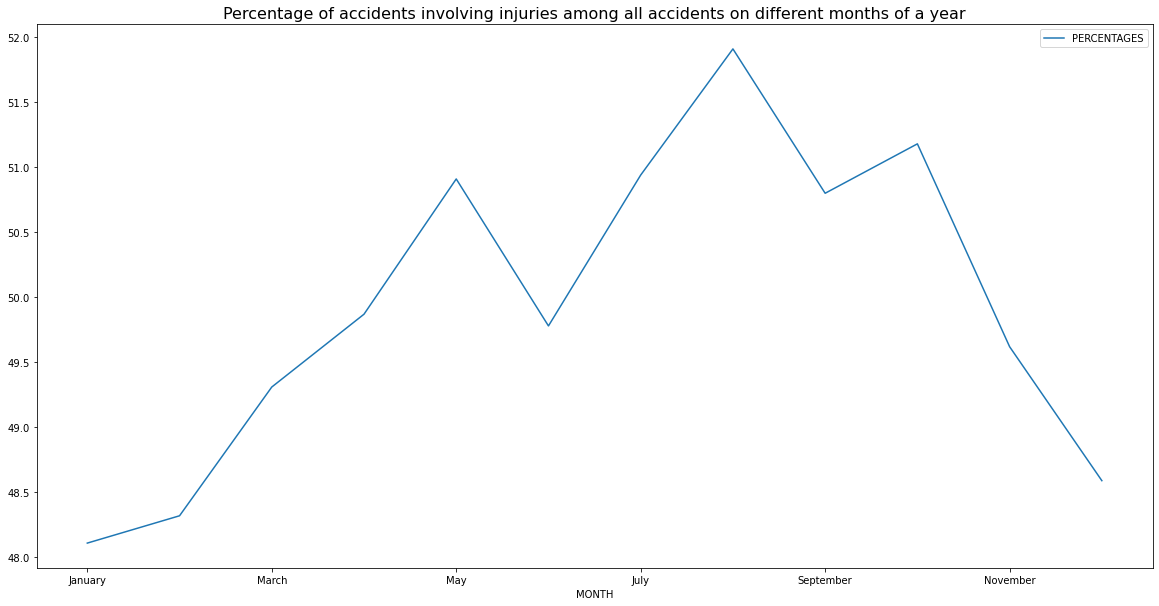

In [39]:
ax_m = grpd_m_SC_perc.plot(kind = 'line', figsize = (20, 10))
ax_m.set_title("Percentage of accidents involving injuries among all accidents on different months of a year", fontsize = 16)
legend = ax_m.legend()
for percentage in ax_m.patches:
    ax_m.annotate(str(percentage.get_height()) + '%', xy = (percentage.get_x(), percentage.get_height() + 0.3), fontsize = 14)

We can infer that the accidents are slightly less severe in the winter. 

## Feature Selection and Preprocessing

Before we feed our data into machine learning models, we need to select which features are we need and convert the values to the format which can be fed into machine learning models. 

In explanatory data analysing step, we analyzed how different features related to the severity of an accidet. Some of the features such as weather condition and address type are strongly correlated to the severity of accidents, while other features such as day of a week or month of a year have only a little correlation with the severity of accidents. In addition, feature weather condition, feature month of a year and feature road condition are overlapping with each others. For example, snowing only happen in winter, and the road condition will be snow when the weather condition is snowing. Feature light condition also overlapping with feature time of a day, when the light condition is night, the time of a day will definitely after 21. 

Therefore, we only select address type **ADDRTYPE**, weather condition **WEATHER** and light condition **LIGHTCOND** as features. 

All three features we selected need to be converted to the format that can be fed into machine learning models, we use one-hot encoding to label them. Firstly, split the data into X (features) and Y (target): 

In [182]:
X = collisions[['ADDRTYPE', 'WEATHER', 'LIGHTCOND']]
Y = collisions[['SEVERITYCODE']]

Then we encode the features in X using one-hot encoding:

In [183]:
X = pd.get_dummies(X, drop_first = True, columns = ['ADDRTYPE', 'WEATHER', 'LIGHTCOND'])
X.head()

,ADDRTYPE_Block,ADDRTYPE_Intersection,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Raining,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk
178895,0,1,0,0,1,0,0,0,0,0,1,0
176892,0,1,0,0,0,0,0,0,1,0,0,0
72113,1,0,0,0,0,0,0,0,1,0,0,0
42683,1,0,0,0,0,0,0,0,0,0,1,0
194212,0,1,0,0,0,0,0,0,0,0,1,0


For train/test split, we use 70% of the data for training and 30% of the data for testing. 

In [184]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (77660, 12) (77660, 1)
Test set: (33284, 12) (33284, 1)


## Machine Learning Models

Because the task of this project is to classification and our target only have two values, we use decision tree and logistic regression as our machine learning models. 

### Decision Tree

In [185]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

collision_tree = tree.DecisionTreeClassifier(random_state=0)
clf = collision_tree.fit(X_train,Y_train)
Y_DT_pred = collision_tree.predict(X_test)
#fig, ax_tree = plt.subplots(figsize=(50, 40))
#tree.plot_tree(clf, fontsize=10)
#plt.show()

### Logistic Regression

In [186]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 1, solver='liblinear')
LR.fit(X_train, Y_train)
Y_LR_pred = LR.predict(X_test)
Y_LR_prob = LR.predict_proba(X_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Results and Evaluation

Now, check the accuracy of our models, 

In [158]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## Decision Tree

In [187]:
f1_score(Y_test, Y_DT_pred, average='macro')

0.5860910942444686

In [165]:
print(classification_report(Y_test, Y_DT_pred))

              precision    recall  f1-score   support

           1       0.58      0.70      0.63     16662
           2       0.61      0.48      0.54     16622

    accuracy                           0.59     33284
   macro avg       0.59      0.59      0.59     33284
weighted avg       0.59      0.59      0.59     33284



## Logistic Regression

In [163]:
f1_score(Y_test, Y_LR_pred, average='macro')

0.5865646443755439

In [168]:
log_loss(Y_test, Y_LR_prob)

0.6745473339536407

In [166]:
print(classification_report(Y_test, Y_LR_pred))

              precision    recall  f1-score   support

           1       0.58      0.70      0.63     16662
           2       0.61      0.49      0.54     16622

    accuracy                           0.59     33284
   macro avg       0.60      0.59      0.59     33284
weighted avg       0.60      0.59      0.59     33284



## Descussion and Conclusion

At the beginning of this project, we first cleaned the data. We dropped the missing values, dropped the values with insufficient data, changed the data type of features to our desired data type, then made the data balanced by downsampling the majority class to match the minority class. 

After we cleaned the data, we visualized the data. We compared the probabilities of injury in accidents under different address types, road conditions, weather conditions, light conditions, time of days, day of weeks and month of years. Then we decided to use address type, weather condition and light condition as features for our machine learning model. 

After we cleaned and analyzed the data, we encoded the features using one-hot encoding, then we feed the data to two machine learning modele: decision tree and logistic regression. 

We used F-1 score to test the accuracy of our decision tree model and logistic regression model and we also used logistic loss to test the accuracy of our logistic regression model. 

However, the result is not as good as we expected, the accuracy of both models are not very high. Therefore, we conclude that location, condition and time have some impact on the severity of an accident. 